In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dogs-vs-cats/test1.zip
/kaggle/input/dogs-vs-cats/train.zip
/kaggle/input/dogs-vs-cats/sampleSubmission.csv


## Table of Contents

1 [Introduction](#1)

2 [Importing Libraries](#2)

2.1 [Setting Path](#2.1)

2.2 [Importing Data](#2.2)

3 [Data Distribution of whole Data](#3)

4 [Splitting the Data](#4)

4.1 [Distribution of Train Data](#4.1)

4.2 [Distribution of Test Data](#4.2)

5 [Image Data Generator](#5)

6 [Convolutional Neural Network](#6)

6.1 [Displaying The Model](#6.1)

7 [Plotting the result](#7)

8 [Model Evaluation](#8)

8.1[Classification Report](#8.1)

9 [Predition Comparsion](#9)

10 [Confusion Matrix](#10)

<h1  id="1" style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:350%;
           font-family:Verdana;
           letter-spacing:0.5px"> Introduction </h1>
             
Anggota Kelompok:
1. Ammar Sufyan         (11200910000054)
2. Fauzan Farhan Antoro (11200910000004)       


<h1  id="2" style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:350%;
           font-family:Verdana;
           letter-spacing:0.5px"> 2 Importing Libraries </h1>
           


In [2]:
''' importing library''' 

import numpy as np
import sys
import tensorflow as tf
import os
import sys
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator


%matplotlib inline
import matplotlib.image as img
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
import plotly.graph_objects as go
import itertools
import plotly.express as px

In [3]:
'''setting seed'''
seed = 0
np.random.seed(seed)
tf.random.set_seed(3)

<h1  id="2.1" style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:350%;
           font-family:Verdana;
           letter-spacing:0.5px"> 2.1 Setting Path and Extracting Files </h1>

In [4]:
import zipfile

zip_files = ['test1', 'train']

for zip_file in zip_files:
    with zipfile.ZipFile("../input/dogs-vs-cats/{}.zip".format(zip_file),"r") as z:
        z.extractall(".")
        print("{} unzipped".format(zip_file))

test1 unzipped
train unzipped


In [5]:
'''test1, train Data is in current working folder'''
print(os.listdir('../working'))

['train', '__notebook_source__.ipynb', 'test1', '.virtual_documents']


<h3  id="2.2" style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:350%;
           font-family:Verdana;
           letter-spacing:0.5px">  Importing Data </h3>

In [6]:
IMAGE_FOLDER_PATH = "../working/train"
FILE_NAMES = os.listdir(IMAGE_FOLDER_PATH)
WIDTH = 150
HEIGHT = 150

In [7]:
FILE_NAMES[0:5]

['dog.4433.jpg',
 'cat.7239.jpg',
 'dog.1732.jpg',
 'cat.1729.jpg',
 'cat.1486.jpg']

In [8]:
labels = []
for i in os.listdir(IMAGE_FOLDER_PATH):
    labels+=[i]

<h1  id="3" style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:350%;
           font-family:Verdana;
           letter-spacing:0.5px">  Data distribution of all data </h1>

In [9]:
# empty list
targets = list()
full_paths = list()
train_cats_dir = list()
train_dogs_dir = list()

# finding each file's target
for file_name in FILE_NAMES:
    target = file_name.split(".")[0] # target name
    full_path = os.path.join(IMAGE_FOLDER_PATH, file_name)
    
    if(target == "dog"):
        train_dogs_dir.append(full_path)
    if(target == "cat"):
        train_cats_dir.append(full_path)
    
    full_paths.append(full_path)
    targets.append(target)

dataset = pd.DataFrame() # make dataframe
dataset['image_path'] = full_paths # file path
dataset['target'] = targets # file's target

In [10]:
dataset.head(10)

,image_path,target
0,../working/train/dog.4433.jpg,dog
1,../working/train/cat.7239.jpg,cat
2,../working/train/dog.1732.jpg,dog
3,../working/train/cat.1729.jpg,cat
4,../working/train/cat.1486.jpg,cat
5,../working/train/dog.6187.jpg,dog
6,../working/train/cat.3406.jpg,cat
7,../working/train/dog.10053.jpg,dog
8,../working/train/dog.7854.jpg,dog
9,../working/train/dog.12038.jpg,dog


In [11]:
print("total data counts:", dataset['target'].count())
counts = dataset['target'].value_counts()
print(counts)

total data counts: 25000
dog    12500
cat    12500
Name: target, dtype: int64


In [12]:
fig = go.Figure(go.Bar(
            x= counts.values,
            y=counts.index,
            orientation='h'))

fig.update_layout(title='Data Distribution in Bars',font_size=15,title_x=0.45)


fig.show()

In [13]:
fig=px.pie(counts.head(10),values= 'target', names=dataset['target'].unique(),hole=0.425)
fig.update_layout(title='Data Distribution of Data',font_size=15,title_x=0.45,annotations=[dict(text='Cat vs Dog',font_size=18, showarrow=False,height=800,width=700)])
fig.update_traces(textfont_size=15,textinfo='percent')
fig.show()

<h1  id="5" style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:350%;
           font-family:Verdana;
           letter-spacing:0.5px"> Displaying Images of Cat </h1>

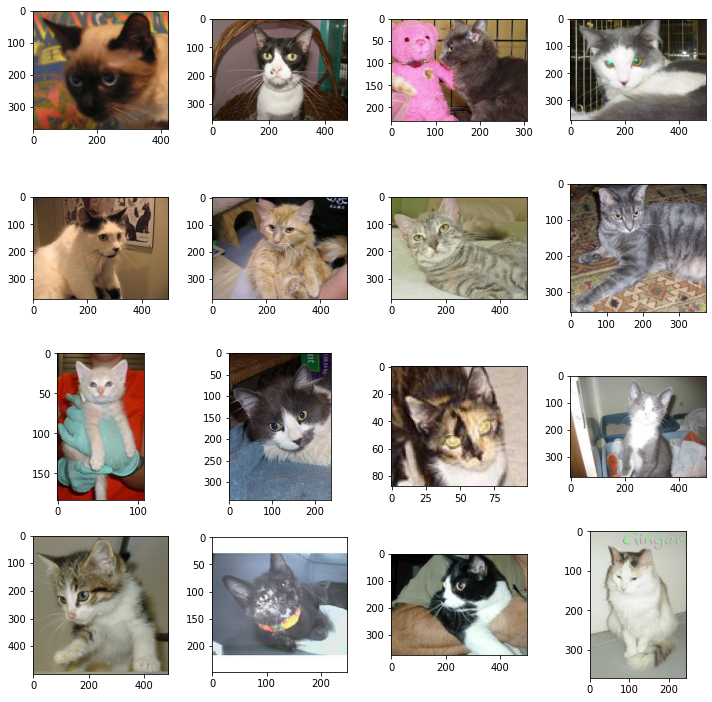

In [14]:
rows = 4
cols = 4
axes = []
fig=plt.figure(figsize=(10,10))
i = 0

for a in range(rows*cols):
    b = img.imread(train_cats_dir[i])
    axes.append(fig.add_subplot(rows,cols,a+1))
    plt.imshow(b)
    i+=1
fig.tight_layout()
plt.show()

<h1  id="5.1" style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:350%;
           font-family:Verdana;
           letter-spacing:0.5px">  Displaying Images of Dog </h1>

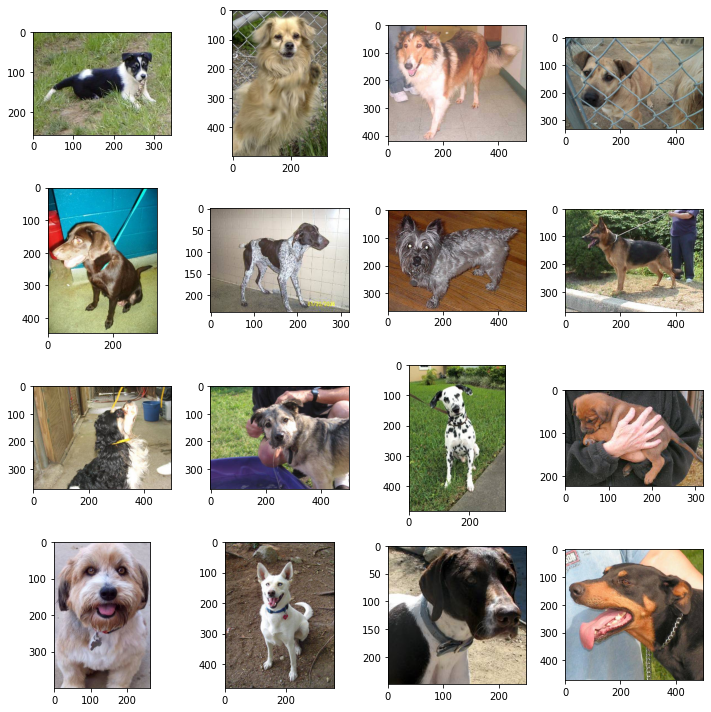

In [15]:
rows = 4
cols = 4
axes = []
fig=plt.figure(figsize=(10,10))
i = 0

for a in range(rows*cols):
    b = img.imread(train_dogs_dir[i])
    axes.append(fig.add_subplot(rows,cols,a+1))
    plt.imshow(b)
    i+=1
fig.tight_layout()
plt.show()

<h1  id="6" style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:350%;
           font-family:Verdana;
           letter-spacing:0.5px"> 6 Splitting the data </h1>

In [16]:
dataset_train, dataset_test = train_test_split(dataset, test_size=0.2, random_state=seed)

<h1  id="7" style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:350%;
           font-family:Verdana;
           letter-spacing:0.5px"> 7 Data Distribution of Train Data </h1>

In [17]:
class_id_distributionTrain = dataset_train['target'].value_counts()
class_id_distributionTrain.head(10)

dog    10041
cat     9959
Name: target, dtype: int64

In [18]:
fig = go.Figure(go.Bar(
            x=class_id_distributionTrain.values,
            y=class_id_distributionTrain.index,
            orientation='h'))

fig.update_layout(title='Data Distribution Of Train Data in Bars',font_size=15,title_x=0.45)

fig.show()

In [19]:
fig=px.pie(class_id_distributionTrain.head(10),values= 'target', names=dataset_train['target'].unique(),hole=0.425)
fig.update_layout(title='Data Distribution of Train Data in Pie Chart',font_size=15,title_x=0.45,annotations=[dict(text='Cat vs Dog',font_size=18, showarrow=False,height=800,width=700)])
fig.update_traces(textfont_size=15,textinfo='percent')
fig.show()

<h1  id="7.1" style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:350%;
           font-family:Verdana;
           letter-spacing:0.5px"> 7.1 Data Distribution of Test data </h1>

In [20]:
class_id_distributionTest = dataset_test['target'].value_counts()
class_id_distributionTest.head(10)

cat    2541
dog    2459
Name: target, dtype: int64

In [43]:
fig = go.Figure(go.Bar(
            x=class_id_distributionTest.values,
            y=class_id_distributionTest.index,
            orientation='h'))

fig.update_layout(title='Data Distribution Of Test Data in Bars',font_size=15,title_x=0.45)

fig.show()

In [44]:
fig=px.pie(class_id_distributionTest.head(10),values= 'target', names=dataset_test['target'].unique(),hole=0.425)
fig.update_layout(title='Data Distribution of Test Data in Pie Chart',font_size=15,title_x=0.45,annotations=[dict(text='Cat vs Dog',font_size=18, showarrow=False,height=800,width=700)])
fig.update_traces(textfont_size=15,textinfo='percent')
fig.show()


<h1  id="8" style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:350%;
           font-family:Verdana;
           letter-spacing:0.5px"> 9 Image Data Generator </h1>
           
 



<span style="font-family:cursive; font-size:35px;">When there is little data to train, we have to use ImageDataGenerator to increase the number of data.</span>

<span style="font-family:cursive; font-size:15px;">1. rescale = 1./255 : change the value between 0 and 1</span>

<span style="font-family:cursive; font-size:15px;">2. rotation_range = 15 : Random rotation within 15 degrees</span>

<span style="font-family:cursive; font-size:15px;">3. shear_range = 0.1 : shear range 10% </span>

<span style="font-family:cursive; font-size:15px;">4. zoom_range = 0.2 : zoom range 20%</span>

<span style="font-family:cursive; font-size:15px;">5. horizontal_flip = True : Randomly flip horizontally. </span>

<span style="font-family:cursive; font-size:15px;">6. width_shift_range = 0.1 : Randomly move the original image horizontally within 10% of the width </span>

<span style="font-family:cursive; font-size:15px;">7. height_shift_range=0.1 : Randomly move the original image vertically within 10% of the width</span>

















In [23]:
train_datagen=ImageDataGenerator(
rotation_range=15,
rescale=1./255,
shear_range=0.1,
zoom_range=0.2,
horizontal_flip=True,
width_shift_range=0.1,
height_shift_range=0.1)

train_datagenerator=train_datagen.flow_from_dataframe(dataframe=dataset_train,
                                                     x_col="image_path",
                                                     y_col="target",
                                                     target_size=(WIDTH, HEIGHT),
                                                     class_mode="binary",
                                                     batch_size=150)

Found 20000 validated image filenames belonging to 2 classes.


In [24]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_datagenerator=test_datagen.flow_from_dataframe(dataframe=dataset_test,
                                                   x_col="image_path",
                                                   y_col="target",
                                                   target_size=(WIDTH, HEIGHT),
                                                   class_mode="binary",
                                                   batch_size=150)

Found 5000 validated image filenames belonging to 2 classes.



<h1  id="10" style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:350%;
           font-family:Verdana;
           letter-spacing:0.5px"> 10 Making CNN Model </h1>

![CNN](https://raw.githubusercontent.com/106AbdulBasit/Kaggle-Projects/main/Cat%20Vs%20Dog/97717Cats-Dogs-Classification-deep-learning.gif)


<span style="font-family:cursive; font-size:15px;">Yan LeCun and Yoshua Bengoi introduced a Convolutional Neural Network in the Year 1995. Later on, they proved a remarkable achievement because they showed exceptional results in the domain of Images </span>


<span style="font-family:cursive; font-size:15px;">
A convolutional  neural network has three parts.
. </span>


<span style="font-family:cursive; font-size:15px;">1 Convolutional Layer </span>


<span style="font-family:cursive; font-size:15px;">2 Pooling Layer </span>

<span style="font-family:cursive; font-size:15px;">3 Fully Connected Layer </span>

<h4   style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:350%;
           font-family:Verdana;
           letter-spacing:0.5px">  convolutional layer </h4>
           
<span style="font-family:cursive; font-size:15px;">A convolutional layer help to extract the information from the image with the help of filter.  </span>

<span style="font-family:cursive; font-size:15px;">Please have a look the following image.  </span>

![Coonfilter](https://raw.githubusercontent.com/106AbdulBasit/Kaggle-Projects/main/Cat%20Vs%20Dog/Convolutional%20Filter.gif)

<h4   style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:350%;
           font-family:Verdana;
           letter-spacing:0.5px">  Feature Map </h4>


<span style="font-family:cursive; font-size:15px;">It will Take filter and map into image into size of 3 *3. </span>

<span style="font-family:cursive; font-size:15px;">Then It will do some mathematical operation . </span>

<span style="font-family:cursive; font-size:15px;">The Elements get Multiplied and then added to get one output and that out put will save in output feature map . </span>

<span style="font-family:cursive; font-size:15px;">Below Image will clearfiy alot of thing </span>

![](https://raw.githubusercontent.com/106AbdulBasit/Kaggle-Projects/main/Cat%20Vs%20Dog/Featuree%20map.png)


<h4   style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:350%;
           font-family:Verdana;
           letter-spacing:0.5px">  Pooling layer</h4>



<span style="font-family:cursive; font-size:15px;">The Intitution behind the pooling layer is to reduce the dimension of feature map. </span>


<span style="font-family:cursive; font-size:15px;">the 2*2 pooling layer will apply to the  input image and take the maximum value at each slide</span>

<span style="font-family:cursive; font-size:15px;">Following Image will clear the concept more easily</span>

![](https://raw.githubusercontent.com/106AbdulBasit/Kaggle-Projects/main/Cat%20Vs%20Dog/pooling%20Layer.gif)

<h4   style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:350%;
           font-family:Verdana;
           letter-spacing:0.5px">  Fully Connected Layer </h4>

<span style="font-family:cursive; font-size:15px;">The final layer is fully connected layer</span>

<span style="font-family:cursive; font-size:15px;">The input to the fully connected layer is the rich features that have been extracted using convolutional filters.</span>

<span style="font-family:cursive; font-size:15px;">This will follow to the output layer where the probablities will be calculated of the image</span>


<h4   style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:350%;
           font-family:Verdana;
           letter-spacing:0.5px"> Compile all of three </h4>

In [25]:
model = Sequential() # implement model layer 
model.add(Conv2D(32, kernel_size=(3,3), input_shape=(WIDTH, HEIGHT, 3), activation='relu'))
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

2022-12-03 09:41:15.075053: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-03 09:41:15.079561: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-03 09:41:15.080775: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-03 09:41:15.083378: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

<span style="font-family:cursive; font-size:15px;">The Final Architecture looks like</span>

![](https://raw.githubusercontent.com/106AbdulBasit/Kaggle-Projects/main/Cat%20Vs%20Dog/CNNarct.PNG)


<h1  id="11" style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:350%;
           font-family:Verdana;
           letter-spacing:0.5px"> 11 Displaying The Model </h1>

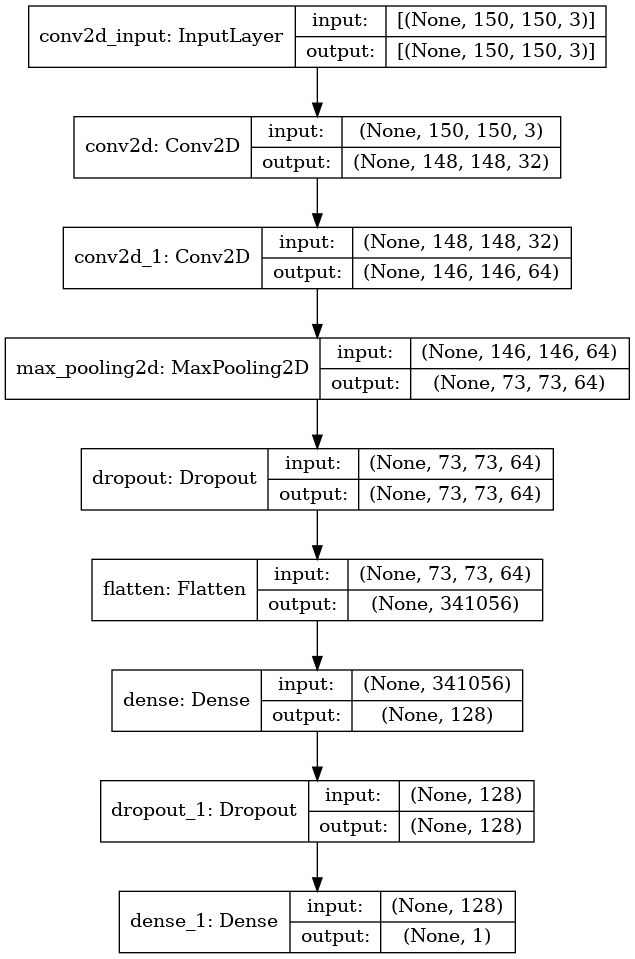

In [26]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(model, to_file='convnet.png', show_shapes=True,show_layer_names=True)
Image(filename='convnet.png') 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 989.9/989.9 kB 1.1 MB/s eta 0:00:0000:0100:01


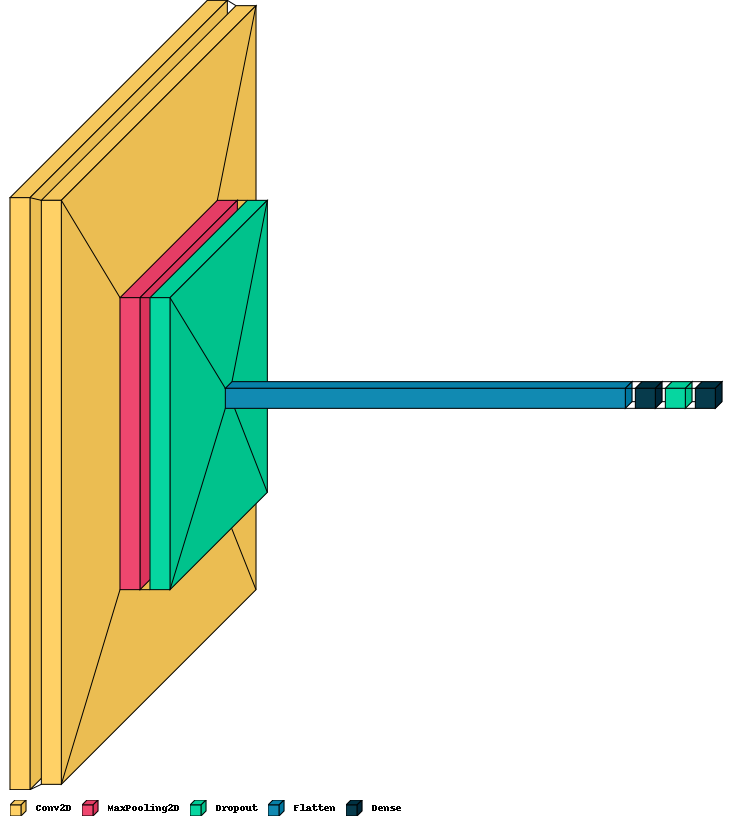

In [27]:
!pip install visualkeras
import visualkeras
visualkeras.layered_view(model, legend=True) 

In [28]:
model.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 146, 146, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 73, 73, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 73, 73, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 341056)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               43655296  
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0


<h1  id="12" style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:350%;
           font-family:Verdana;
           letter-spacing:0.5px"> 12 Train The Model </h1>

In [29]:
History=model.fit(train_datagenerator,
                       epochs=80,
                       validation_data=test_datagenerator,
                       validation_steps=dataset_test.shape[0]/150,
                       steps_per_epoch=dataset_train.shape[0]/150)

2022-12-03 09:42:24.152584: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/80


2022-12-03 09:42:26.955851: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


133/133 [==============================] - 175s 1s/step - loss: 0.9552 - accuracy: 0.5983 - val_loss: 0.6087 - val_accuracy: 0.6448
Epoch 2/80
133/133 [==============================] - 166s 1s/step - loss: 0.5933 - accuracy: 0.6888 - val_loss: 0.5472 - val_accuracy: 0.7120
Epoch 3/80
133/133 [==============================] - 167s 1s/step - loss: 0.5625 - accuracy: 0.7114 - val_loss: 0.5202 - val_accuracy: 0.7376
Epoch 4/80
133/133 [==============================] - 166s 1s/step - loss: 0.5389 - accuracy: 0.7265 - val_loss: 0.5043 - val_accuracy: 0.7476
Epoch 5/80
133/133 [==============================] - 165s 1s/step - loss: 0.5219 - accuracy: 0.7418 - val_loss: 0.4763 - val_accuracy: 0.7670
Epoch 6/80
133/133 [==============================] - 166s 1s/step - loss: 0.5051 - accuracy: 0.7517 - val_loss: 0.4869 - val_accuracy: 0.7678
Epoch 7/80
133/133 [==============================] - 166s 1s/step - loss: 0.4898 - accuracy: 0.7643 - val_loss: 0.4863 - val_accuracy: 0.7670
Epoch 8/80

In [30]:
model.save("model_catsVSdogs_80epoch.h5")

In [31]:
import pickle

In [33]:
with open('../working/trainHistoryDict', 'wb') as file_pi:
    pickle.dump(History.history, file_pi)


<h1  id="13" style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:350%;
           font-family:Verdana;
           letter-spacing:0.5px">  13 Plotting Loss and Accuracy </h1>

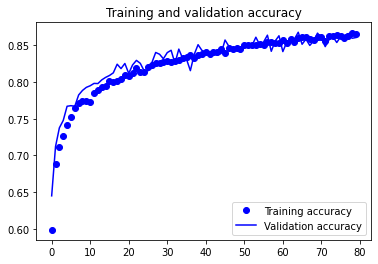

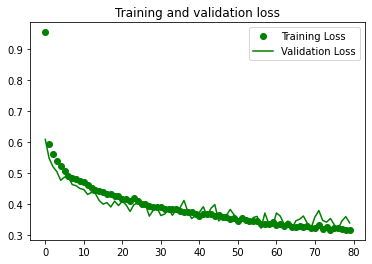

In [34]:
acc = History.history['accuracy']
val_acc = History.history['val_accuracy']
loss = History.history['loss']
val_loss = History.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'go', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

[](http://)



<h1  id="14" style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:350%;
           font-family:Verdana;
           letter-spacing:0.5px">  Model Evaluation </h1>

In [35]:
 test_loss, test_acc = model.evaluate(test_datagenerator, steps=len(test_datagenerator), verbose=1)
 print('Loss: %.3f' % (test_loss * 100.0))
 print('Accuracy: %.3f' % (test_acc * 100.0)) 

34/34 [==============================] - 16s 458ms/step - loss: 0.3385 - accuracy: 0.8608
Loss: 33.847
Accuracy: 86.080



<h1  id="15" style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:350%;
           font-family:Verdana;
           letter-spacing:0.5px"> 15  Confusion Matrix </h1>

In [36]:
from sklearn.metrics import confusion_matrix
import itertools

In [37]:
predictions = model.predict(x=test_datagenerator, steps= len(test_datagenerator), verbose=0)

In [38]:
test_datagenerator.classes

[1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,


In [39]:
cm = confusion_matrix(y_true=test_datagenerator.classes, y_pred=np.argmax(predictions, axis=-1))

In [40]:
def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
        print(cm)
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black")
        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[2541    0]
 [2459    0]]


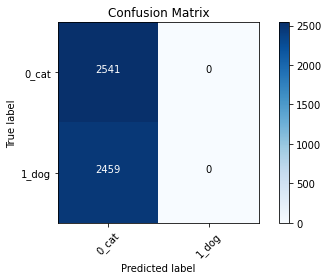

In [41]:
cm_plot_labels = ['0_cat', '1_dog']

plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')